Sascha Spors,
Professorship Signal Theory and Digital Signal Processing,
Institute of Communications Engineering (INT),
Faculty of Computer Science and Electrical Engineering (IEF),
University of Rostock,
Germany

# Tutorial Digital Signal Processing

**DFT Fundamentals**,
Winter Semester 2021/22 (Course #24505)

- lecture: https://github.com/spatialaudio/digital-signal-processing-lecture
- tutorial: https://github.com/spatialaudio/digital-signal-processing-exercises

Feel free to contact lecturer frank.schultz@uni-rostock.de

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft
#from scipy.fft import fft, ifft
from scipy.special import diric


def dft2dtft(X, Om):  # from dft_to_dtft_interpolation.ipynb
    N = len(X)
    Xi = np.zeros(len(Om), dtype='complex')
    for i, Omega in enumerate(Om):
        for mu_dft in range(N):
            Xi[i] += X[mu_dft] *\
                np.exp(-1j/2*(Omega - 2*np.pi/N*mu_dft)*(N-1)) *\
                diric(Omega - 2*np.pi/N*mu_dft, N)
    return Xi


width = 10
height = 10/16 * width
figsize = (width, height)

# Calculate DFT / DTFT

In [2]:
# DFT stuff
N = 16  # DFT block size

k = np.arange(N)  # time index
mu = np.arange(N)  # frequency index for DFT
dOm = 2*np.pi / N  # DFT's Omega resolution
twiddle = np.exp(+1j*dOm)  # basis twiddle factor
# 1/np.sqrt(N) yields an orthonormal!!! Fourier matrix:
W = (twiddle**np.outer(k, k)) / np.sqrt(N)

# create signal

# frequency scale factor in term sof DFT's dOm:
mu_x = 1.0  # best case = is a DFT eigensignal
# mu_x = 1.5  # worst case -> between two DFT eigensignals

tmp = np.exp(+1j*dOm*k * mu_x) / np.sqrt(N)
x = tmp  # complex signal
# x = tmp.real  # real signal-> cosine
# x = tmp.imag  # real signal-> sine

# calc DFT
X = W.conj() @ x
# X_tmp = fft(x) * 1/np.sqrt(N)  # needs 1/np.sqrt(N) to be consistent with above defined W!!!
# print(np.allclose(X, X_tmp))

# calc IDFT
x_tmp = W @ X
print('x = IDFT(DFT(x)): ', np.allclose(x, x_tmp))
# x_tmp = ifft(X) * np.sqrt(N)  # needs 1/np.sqrt(N) to be consistent with above defined W!!!
# print(np.allclose(x, x_tmp))

# calc DFT -> DTFT interpolation
N_dtft = 2**10  # number of frequencies along unit circle at which DTFT values are calc
Om_dtft = np.arange(N_dtft) * 2*np.pi/N_dtft  # set up frequency vector
X_dtft = dft2dtft(X, Om_dtft)  # perform interp

x = IDFT(DFT(x)):  True


# Signal Model Corresponding to DFT

- both, the signal and the DFT spectrum are periodic in $N$
- both, the signal and the DFT spectrum are discrete signals

## Plot Real/Imaginary Parts of Signal and DFT Spectrum

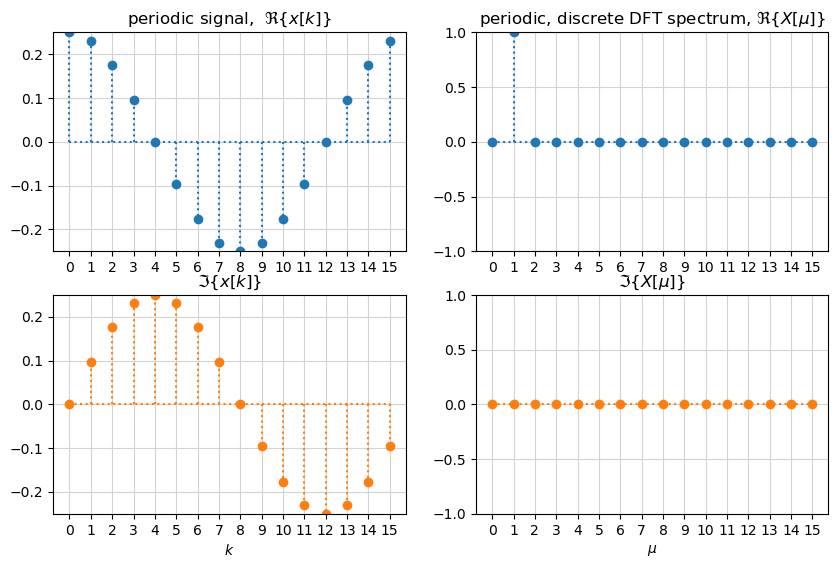

In [3]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=figsize)
ax[0, 0].stem(k, x.real, basefmt='C0:', linefmt='C0:', markerfmt='C0o')
ax[1, 0].stem(k, x.imag, basefmt='C1:', linefmt='C1:', markerfmt='C1o')
ax[0, 1].stem(mu, X.real, basefmt='C0:', linefmt='C0:', markerfmt='C0o')
ax[1, 1].stem(mu, X.imag, basefmt='C1:', linefmt='C1:', markerfmt='C1o')
for i in range(2):
    ax[i, 0].set_xticks(np.arange(N))
    ax[i, 1].set_xticks(np.arange(N))
    ax[i, 0].set_ylim(-1/np.sqrt(N), +1/np.sqrt(N))
    ax[i, 1].set_ylim(-1, +1)
    ax[i, 0].grid(True, color='lightgray')
    ax[i, 1].grid(True, color='lightgray')
ax[0, 0].set_title(r'periodic signal,  $\Re\{x[k]\}$')
ax[1, 0].set_title(r'$\Im\{x[k]\}$')
ax[0, 1].set_title(r'periodic, discrete DFT spectrum, $\Re\{X[\mu]\}$')
ax[1, 1].set_title(r'$\Im\{X[\mu]\}$')
ax[1, 0].set_xlabel(r'$k$')
ax[1, 1].set_xlabel(r'$\mu$');

## Plot Real/Imaginary Parts of Signal and Magnitude/Phase of DFT Spectrum

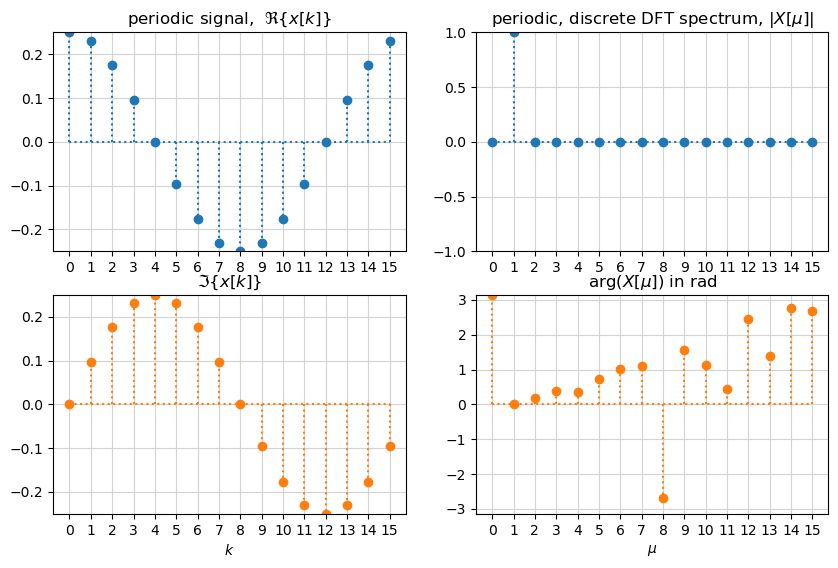

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=figsize)
ax[0, 0].stem(k, x.real, basefmt='C0:', linefmt='C0:', markerfmt='C0o')
ax[1, 0].stem(k, x.imag, basefmt='C1:', linefmt='C1:', markerfmt='C1o')
ax[0, 1].stem(mu, np.abs(X), basefmt='C0:', linefmt='C0:', markerfmt='C0o')
ax[1, 1].stem(mu, np.angle(X), basefmt='C1:', linefmt='C1:', markerfmt='C1o')
for i in range(2):
    ax[i, 0].set_xticks(np.arange(N))
    ax[i, 1].set_xticks(np.arange(N))
    ax[i, 0].set_ylim(-1/np.sqrt(N), +1/np.sqrt(N))
    ax[i, 0].grid(True, color='lightgray')
    ax[i, 1].grid(True, color='lightgray')
ax[0, 1].set_ylim(-1, +1)
ax[1, 1].set_ylim(-np.pi, +np.pi)
ax[0, 0].set_title(r'periodic signal,  $\Re\{x[k]\}$')
ax[1, 0].set_title(r'$\Im\{x[k]\}$')
ax[0, 1].set_title(r'periodic, discrete DFT spectrum, $|X[\mu]|$')
ax[1, 1].set_title(r'$\arg(X[\mu])$ in rad')
ax[1, 0].set_xlabel(r'$k$')
ax[1, 1].set_xlabel(r'$\mu$');

# Signal Model Corresponding to DTFT

- the signal $x[k]$ is zero for $k<0$ and $k>N-1$, thus **non-periodic**
- the signal is discrete
- the DTFT spectrum is periodic in $2\pi$
- the DTFT spectrum is continous

## Plot Real/Imaginary Parts of Signal and DTFT Spectrum

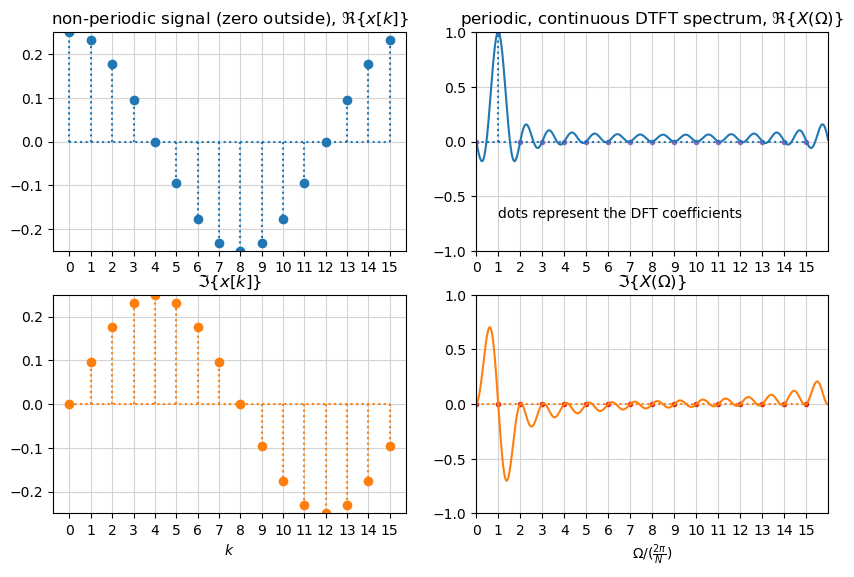

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=figsize)
ax[0, 0].stem(k, x.real, basefmt='C0:', linefmt='C0:', markerfmt='C0o')
ax[1, 0].stem(k, x.imag, basefmt='C1:', linefmt='C1:', markerfmt='C1o')
ax[0, 1].stem((mu*dOm)/dOm, X.real, basefmt='C0:', linefmt='C0:', markerfmt='C4.')
ax[1, 1].stem((mu*dOm)/dOm, X.imag, basefmt='C1:', linefmt='C1:', markerfmt='C3.')
ax[0, 1].plot(Om_dtft/dOm, X_dtft.real, 'C0')
ax[1, 1].plot(Om_dtft/dOm, X_dtft.imag, 'C1')
for i in range(2):
    ax[i, 1].set_xlim((0, N))
    ax[i, 0].set_xticks(np.arange(N))
    ax[i, 1].set_xticks(np.arange(N))
    ax[i, 0].set_ylim(-1/np.sqrt(N), +1/np.sqrt(N))
    ax[i, 1].set_ylim(-1, +1)
    ax[i, 0].grid(True, color='lightgray')
    ax[i, 1].grid(True, color='lightgray')
ax[0, 0].set_title(r'non-periodic signal (zero outside), $\Re\{x[k]\}$')
ax[1, 0].set_title(r'$\Im\{x[k]\}$')
ax[0, 1].set_title(r'periodic, continuous DTFT spectrum, $\Re\{X(\Omega)\}$')
ax[1, 1].set_title(r'$\Im\{X(\Omega)\}$')
ax[1, 0].set_xlabel(r'$k$')
ax[1, 1].set_xlabel(r'$\Omega / (\frac{2 \pi}{N})$')
ax[0, 1].text(1, -0.7, 'dots represent the DFT coefficients');

## Plot Real/Imaginary Parts of Signal and Magnitude/Phase of DTFT Spectrum

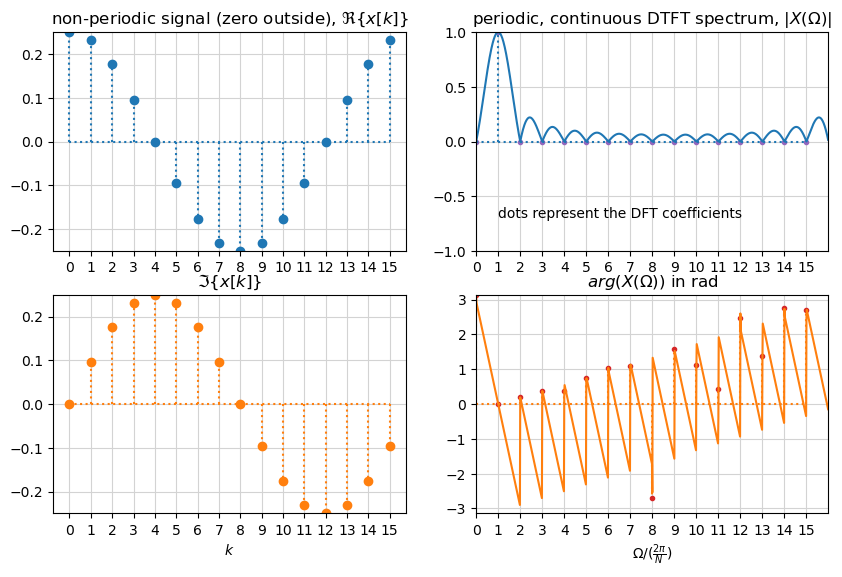

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=figsize)
ax[0, 0].stem(k, x.real, basefmt='C0:', linefmt='C0:', markerfmt='C0o')
ax[1, 0].stem(k, x.imag, basefmt='C1:', linefmt='C1:', markerfmt='C1o')
ax[0, 1].stem((mu*dOm)/dOm, np.abs(X), basefmt='C0:', linefmt='C0:', markerfmt='C4.')
ax[1, 1].stem((mu*dOm)/dOm, np.angle(X), basefmt='C1:', linefmt='C1:', markerfmt='C3.')
ax[0, 1].plot(Om_dtft/dOm, np.abs(X_dtft), 'C0')
ax[1, 1].plot(Om_dtft/dOm, np.angle(X_dtft), 'C1')
for i in range(2):
    ax[i, 1].set_xlim((0, N))
    ax[i, 0].set_xticks(np.arange(N))
    ax[i, 1].set_xticks(np.arange(N))
    ax[i, 0].set_ylim(-1/np.sqrt(N), +1/np.sqrt(N))
    ax[i, 0].grid(True, color='lightgray')
    ax[i, 1].grid(True, color='lightgray')
ax[0, 1].set_ylim(-1, +1)
ax[1, 1].set_ylim(-np.pi, +np.pi)
ax[0, 0].set_title(r'non-periodic signal (zero outside), $\Re\{x[k]\}$')
ax[1, 0].set_title(r'$\Im\{x[k]\}$')
ax[0, 1].set_title(r'periodic, continuous DTFT spectrum, $|X(\Omega)|$')
ax[1, 1].set_title(r'$arg(X(\Omega))$ in rad')
ax[1, 0].set_xlabel(r'$k$')
ax[1, 1].set_xlabel(r'$\Omega / (\frac{2 \pi}{N})$')
ax[0, 1].text(1, -0.7, 'dots represent the DFT coefficients');

**Copyright**

The notebooks are provided as [Open Educational Resources](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebooks for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Frank Schultz, Digital Signal Processing - A Tutorial Featuring Computational Examples* with the URL https://github.com/spatialaudio/digital-signal-processing-exercises